In [1]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt

In [127]:
df2 = pd.read_csv('C:/Users/DMQA/DATA4.csv', encoding = 'euc-kr')

In [128]:
df2.head()[:2]

,review,ord,ord_group
0,후미권 이끌었고 직선 순위도약 시도나 추입력 발휘안돼 고전,7,0
1,선행으로 경주를 주도했으나 직선막판 근소한 차이로 덜미잡혀,2,1


In [129]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5232 non-null   object
 1   ord        5232 non-null   int64 
 2   ord_group  5232 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 122.8+ KB


# 등수별 분포 확인

In [143]:
ord = list(df2['ord'].value_counts().sort_index())
print(ord)

[525, 529, 537, 505, 495, 451, 428, 417, 381, 339, 279, 186, 84, 75, 1]


<AxesSubplot:>

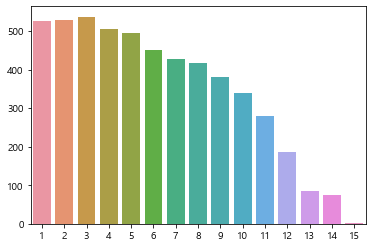

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

sns.barplot(x= list(range(1,16)), y= ord)

In [146]:
N_review = df2[df2['ord_group'] == 0]
P_review = df2[df2['ord_group'] == 1]

In [147]:
from collections import Counter, defaultdict
from konlpy.tag import Okt
plt.rcParams['font.family'] = 'Malgun Gothic'

okt = Okt()

In [148]:
negVoca = defaultdict(Counter) # key : 형태소 value : dict()의 key: 단어 : 카운트
posVoca = defaultdict(Counter) # ex) 명사 - (바보 - (7))

# 리뷰데이터 (token, 품사) 별로 카운팅 하기
for review in N_review['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        negVoca[pos][token] += 1

for review in P_review['review']:
    morphemes = okt.pos(review) # review 형태소 분석하기
    for (token, pos) in morphemes:
        posVoca[pos][token] += 1

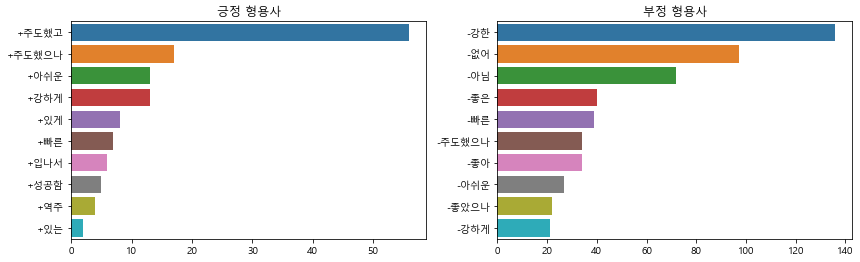

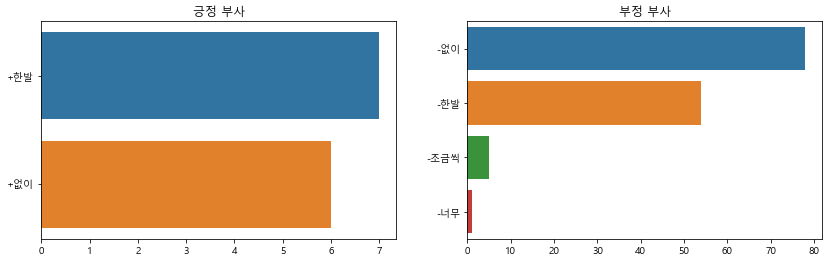

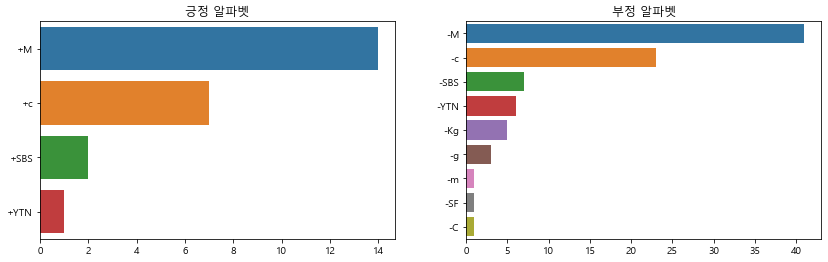

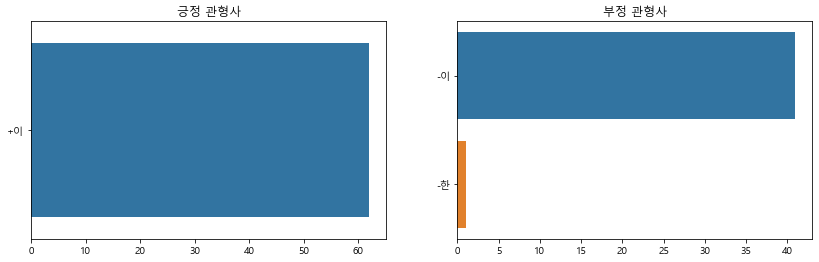

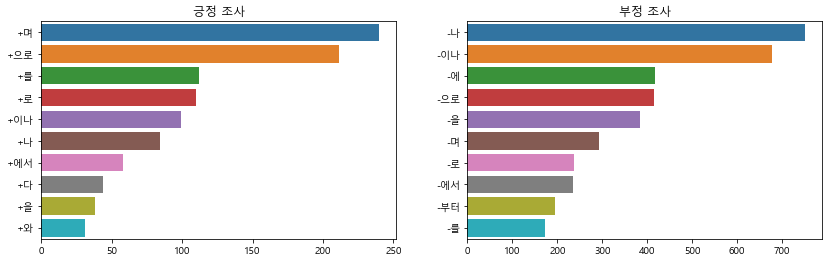

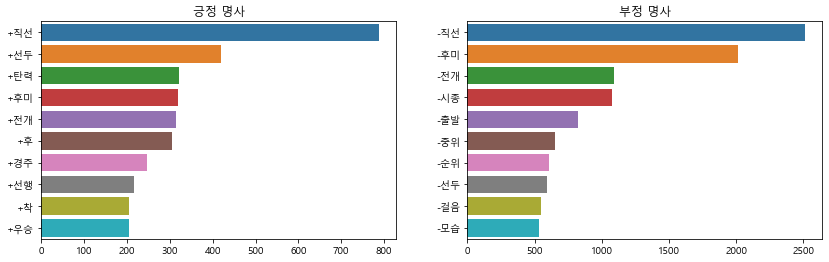

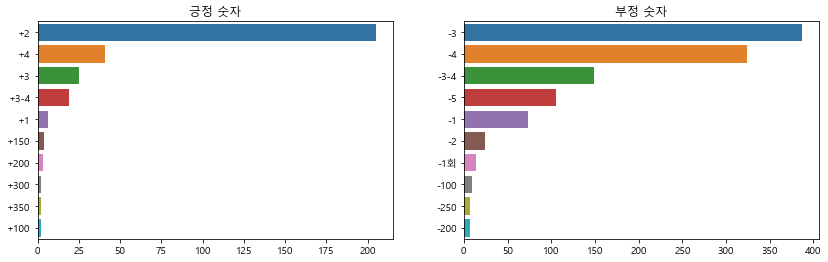

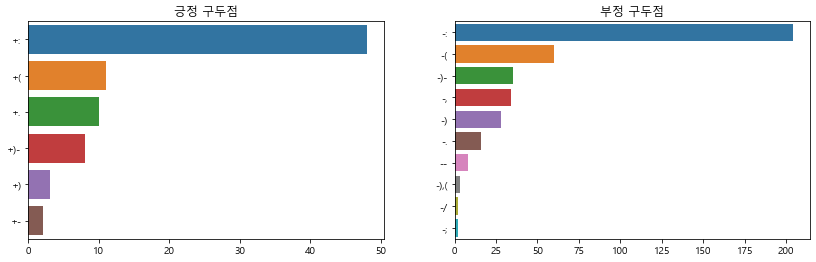

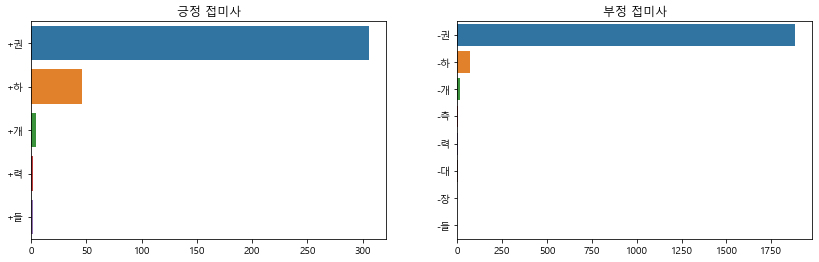

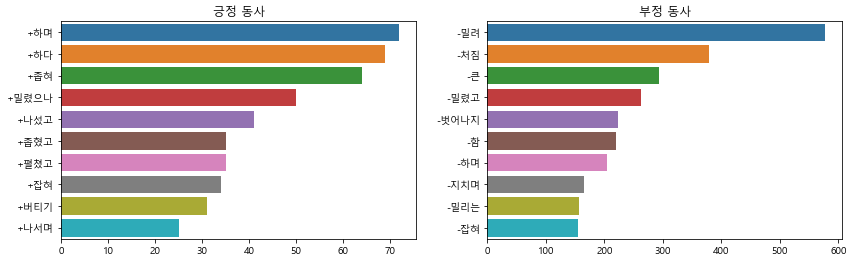

In [149]:
for pos, korPos in okt.tagset.items():
    # 품사당 빈도수가 가장 높은 10개
    _pos = posVoca[pos].most_common()[:10]
    _neg = negVoca[pos].most_common()[:10]

    # 해당하는 품사에 데이터가 없다면 패스!
    if len(_pos) == 0 or len(_neg) == 0:
        continue
    
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # 품사별 토큰의 카운트를 가로그래프로 표시하기 
    sns.barplot(x = [_[1] for _ in _pos], y = ["+" + _[0] for _ in _pos], ax=ax1)
    sns.barplot(x = [_[1] for _ in _neg], y = ["-" + _[0] for _ in _neg], ax=ax2)

    ax1.title.set_text('긍정 ' + korPos)
    ax2.title.set_text('부정 ' + korPos)

    plt.show()

In [150]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [214]:
# data['review']부분을 명사부분만 골라 저장
sentences  = [[token[0] for token in okt.pos(review) if (token[1] == 'Noun' or token[1] == 'Verb') and len(token[0]) > 1] for review in df2['review']]

In [215]:
sentences[:3]

[['후미', '이끌었고', '직선', '순위', '도약', '시도', '입력', '발휘', '고전'],
 ['선행', '경주', '직선', '막판', '근소', '차이', '덜미', '잡혀'],
 ['전반', '걸쳐', '후미', '벗어나지', '따라가는', '모습']]

In [216]:
from gensim.models import Word2Vec

cbow = Word2Vec(sentences, min_count=1, vector_size=64)

In [217]:
print(cbow.wv['탄력'])

[ 0.45377946 -0.17139837  0.26865917  0.11096033 -0.02140884 -0.3111131
  0.17079067  0.1552744  -0.555139   -0.26035836  0.28134516 -0.431728
 -0.18848841 -0.0553011   0.03438683  0.2748078  -0.19829409  0.05171097
 -0.04876108  0.32196176  0.37210792  0.41527218  0.29528627 -0.10994767
 -0.00181431  0.23706062 -0.11852197 -0.00937669  0.15227003 -0.08480516
 -0.03116106  0.03600195 -0.15296324 -0.3389402  -0.218476   -0.07563087
  0.0187764   0.04019048  0.07447992  0.04008888 -0.04350977  0.15556139
 -0.10239381  0.03556303  0.13251692  0.05540677  0.00959196 -0.2241937
  0.04188477  0.18309124 -0.01593873 -0.01779996  0.3905765   0.24274749
  0.36454442 -0.02429006  0.22749531 -0.16135484 -0.20850602  0.14664973
  0.02067534 -0.26881942  0.01948266  0.06330601]


In [218]:
print(cbow.wv.most_similar('밀렸고'))

[('양호', 0.98874431848526), ('밀리는', 0.9875317215919495), ('하위', 0.9844303131103516), ('다시', 0.9841402173042297), ('통과', 0.9835341572761536), ('이상', 0.9834410548210144), ('보여줌', 0.9833592176437378), ('좁히며', 0.9826244115829468), ('조금', 0.9825776219367981), ('늦발', 0.9825775623321533)]


In [219]:
print(cbow.wv.most_similar('우승'))

[('나섰고', 0.9947609305381775), ('펼쳤고', 0.9928643107414246), ('선전', 0.9921507835388184), ('벌이', 0.991531252861023), ('거둠', 0.9904851317405701), ('차지', 0.9898654818534851), ('했고', 0.9892320036888123), ('나서나', 0.9883277416229248), ('벌려', 0.9882892370223999), ('만족', 0.9882750511169434)]


In [227]:
print (len(cbow.wv.index_to_key))

521


In [232]:
print(cbow)
# 클러스터링하기위해 X에다 데이터 넣기
# 임베딩된 벡터들이 들어가게 된다

Word2Vec(vocab=521, vector_size=64, alpha=0.025)


In [238]:
word_vectors = cbow.wv
print(word_vectors)

In [272]:
vocabs = word_vectors.key_to_index
vocabs_list = [vocabs]
X = [word_vectors[v] for v in vocabs]
print(X)

[array([ 0.4757118 , -0.0784682 ,  0.20192195,  0.15978505, -0.09774056,
       -0.28688943,  0.24009888,  0.23738319, -0.46698773, -0.12200649,
        0.27312142, -0.3929706 , -0.28029913,  0.05950333,  0.02194463,
        0.30224434, -0.1574379 ,  0.07755264, -0.15654394,  0.33322018,
        0.39444128,  0.4855176 ,  0.37414283, -0.0863712 , -0.00430784,
        0.18816112, -0.14917265,  0.07719146,  0.23543975, -0.12018082,
       -0.11126039,  0.12181393, -0.17446883, -0.3771724 , -0.22610505,
       -0.10092685,  0.11141737,  0.0409764 ,  0.19719483,  0.09171069,
       -0.08557586,  0.17253926, -0.06166678, -0.03913447,  0.09751288,
        0.04731121, -0.13806686, -0.11941168,  0.06639092,  0.22848305,
       -0.0467243 ,  0.02248327,  0.44006494,  0.30009127,  0.40885365,
        0.09049069,  0.28839135, -0.1707286 , -0.24665064,  0.05425873,
        0.02149189, -0.30386063,  0.05673919,  0.16697714], dtype=float32), array([ 4.26683754e-01, -1.15597337e-01,  1.21677324e-01,  

In [274]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
import numpy as np

# 단어벡터들을 n개의 클러스터로 군집화 해주는 함수 kmeans++을 사용하였다.
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    
    return kmeans_clustering.cluster_centers_, idx

# 출처 : https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57
# 대부분 그대로 사용하였고, 파리미터의 수를 조정하여 사용하였다.

In [307]:
centers, clusters = clustering_on_wordvecs(X, 3)
centroid_map = dict(zip(cbow.wv.index_to_key, clusters))

In [308]:
pd.Series(clusters).value_counts()
# 압도적으로 1개 주제가 제일 많음을 볼 수 있다. 영화라는 공통분모가 있어서 그런 것같다  제대로 클러스터링 됐는지 볼까요?

0    311
1    174
2     36
dtype: int64

In [322]:
X= np.array(X)
print(type(X))

<class 'numpy.ndarray'>


In [323]:
# 각 클러스터에 중심점에서 가장 유사한 벡터들(단어들) k개를 뽑는 함수
def get_top_words(index_to_key, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index_to_key[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [324]:
top_words = get_top_words(cbow.wv.index_to_key, 50, centers, X)

In [325]:
top_words.head()

,Cluster #0,Cluster #1,Cluster #2
1,경고,전검량,정지
2,잘로,다시,출전
3,좁힘,최적,주의
4,독려,만족,앞다리
5,하여,후검량,채찍


In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

In [328]:
# 군지화된 단어들을 워드클라우드로 그려서 보여주는 함수
def display_cloud(cluster_num, cmap):
    wc = WordCloud(
        font_path = "c:/Windows/Fonts/NanumGothic.ttf",
        width = 2000,
        height = 1500,
        background_color="black",
        max_words=20,
        colormap=cmap)
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num-1).zfill(1)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('이전cluster_' + str(cluster_num), bbox_inches='tight')

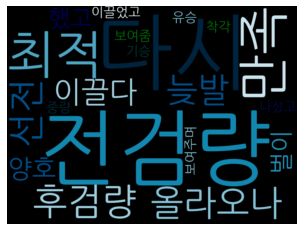

In [333]:

from itertools import cycle
from wordcloud import WordCloud, ImageColorGenerator
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

centers, clusters = clustering_on_wordvecs(X, 3);
centroid_map = dict(zip(cbow.wv.index_to_key, clusters));
top_words = get_top_words(cbow.wv.index_to_key, 50, centers, X)
for i in range(3):
    col = next(cmaps);
    display_cloud(i+1, col)

In [334]:
import matplotlib.font_manager as fm
fm._rebuild()

plt.rc('font', family='Malgun Gothic')

In [335]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl 
from gensim.models import KeyedVectors 
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='D2Coding')

def show_tsne():
    tsne = TSNE(n_components=2)
    X = tsne.fit_transform(X_show)
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
    fig = plt.figure()
    fig.set_size_inches(30, 20)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df['x'], df['y'])
    
    for word, pos in df.iterrows():
        ax.annotate(word, pos, fontsize=10)
        
    plt.xlabel("t-SNE 특성 0")
    plt.ylabel("t-SNE 특성 1")
    plt.show()
    
def show_pca():
    # PCA 모델을 생성합니다
    pca = PCA(n_components=2)
    pca.fit(X_show) # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
    x_pca = pca.transform(X_show)
    
    plt.figure(figsize=(30, 20))
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max())
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max())
    
    for i in range(len(X_show)):
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9})
        plt.xlabel("첫 번째 주성분")
        plt.ylabel("두 번째 주성분")
        plt.show()
        
# sz개의 단어에 대해서만 시각화
sz = 800
X_show = X[:sz,:]
vocab_show = X[:sz]

show_tsne()
show_pca()


ValueError: Index data must be 1-dimensional